In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('E:\\DATA_ANALYSIS\\data\\home-credit-default-risk\\application_train.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Removing the columns which has more than 50% missing values.


In [4]:
na_col = df.isna().sum().sort_values(ascending=False) / len(df)
cols_to_drop = na_col[na_col> 0.5].index
df.drop(columns=cols_to_drop, inplace=True)
df.shape

(307511, 81)

Selected 15 major columns depending upon demographics , financials , employment related features.


In [5]:
key_columns = [
    'SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'CODE_GENDER',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'DAYS_REGISTRATION'
]
df = df[key_columns]
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_TYPE,DAYS_REGISTRATION
0,100002,1,202500.0,406597.5,24700.5,351000.0,-9461,M,Secondary / secondary special,Single / not married,-637,House / apartment,Laborers,Cash loans,-3648.0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,-16765,F,Higher education,Married,-1188,House / apartment,Core staff,Cash loans,-1186.0
2,100004,0,67500.0,135000.0,6750.0,135000.0,-19046,M,Secondary / secondary special,Single / not married,-225,House / apartment,Laborers,Revolving loans,-4260.0
3,100006,0,135000.0,312682.5,29686.5,297000.0,-19005,F,Secondary / secondary special,Civil marriage,-3039,House / apartment,Laborers,Cash loans,-9833.0
4,100007,0,121500.0,513000.0,21865.5,513000.0,-19932,M,Secondary / secondary special,Single / not married,-3038,House / apartment,Core staff,Cash loans,-4311.0


In [7]:
df['AGE_YEAR'] = df['DAYS_BIRTH'] / -365
df['AGE_YEAR'].round()

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: AGE_YEAR, Length: 307511, dtype: float64

In [8]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x:0 if x>0 else x)
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].abs()
df['Years_EMPLOYED'] = df['DAYS_EMPLOYED'] / 365
df['Years_EMPLOYED'].round()


0          2.0
1          3.0
2          1.0
3          8.0
4          8.0
          ... 
307506     1.0
307507     0.0
307508    22.0
307509    13.0
307510     3.0
Name: Years_EMPLOYED, Length: 307511, dtype: float64

UNIVARIATE ANALYSIS

Continuous Features(Numerical Columns)

In [9]:
df['TARGET'].value_counts() / len(df) *100

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

DIstribution of Income to see skewness and spread 

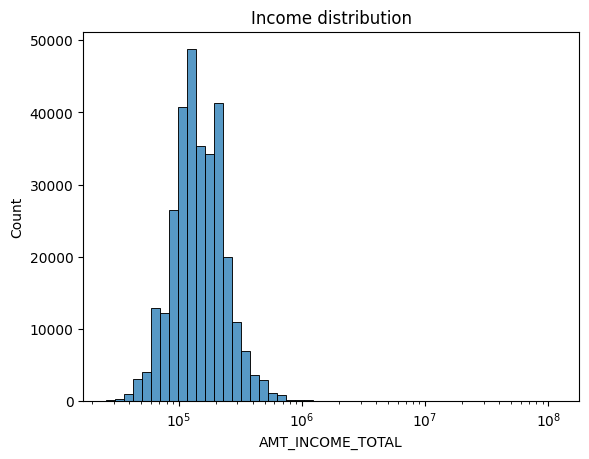

In [10]:
sns.histplot(df['AMT_INCOME_TOTAL'] , bins=50,log_scale=True)
plt.title('Income distribution')
plt.show()

In [52]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'DAYS_REGISTRATION',
       'AGE_YEAR', 'Years_EMPLOYED'],
      dtype='object')

Distribution for AMT_CREDIT

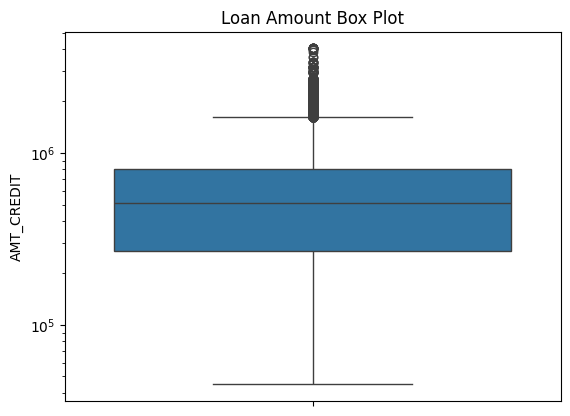

In [11]:
sns.boxplot(df['AMT_CREDIT'])
plt.title("Loan Amount Box Plot")
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

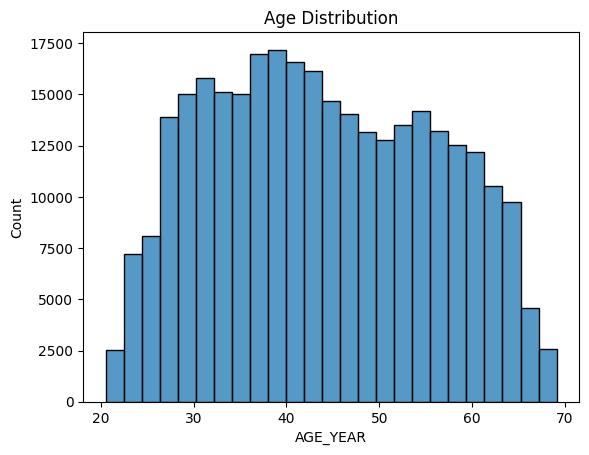

In [12]:
sns.histplot(df['AGE_YEAR'],bins=25)
plt.title('Age Distribution')

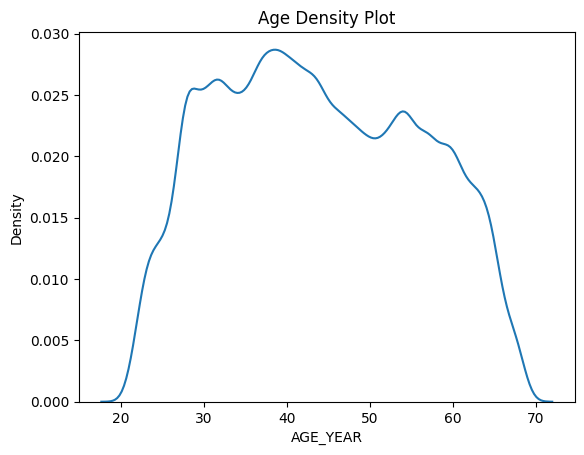

In [13]:
sns.kdeplot(df['AGE_YEAR'])
plt.title('Age Density Plot')
plt.show()

AMOUNT ANNUITY

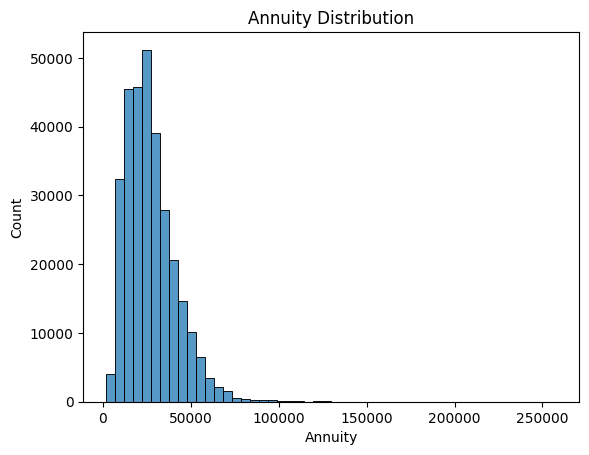

In [14]:
sns.histplot(df['AMT_ANNUITY'], bins=50)
plt.title('Annuity Distribution')
plt.xlabel('Annuity')
plt.show()

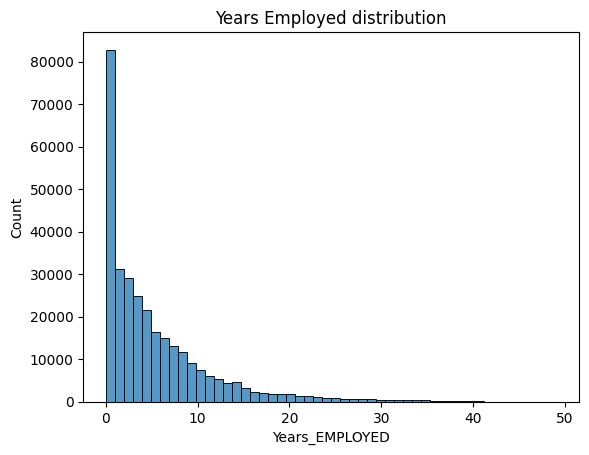

In [15]:
sns.histplot(df['Years_EMPLOYED'],bins=50)
plt.title("Years Employed distribution")
plt.show()

DEBT_INCOME_RATIO distribution

In [17]:
df['DEBT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

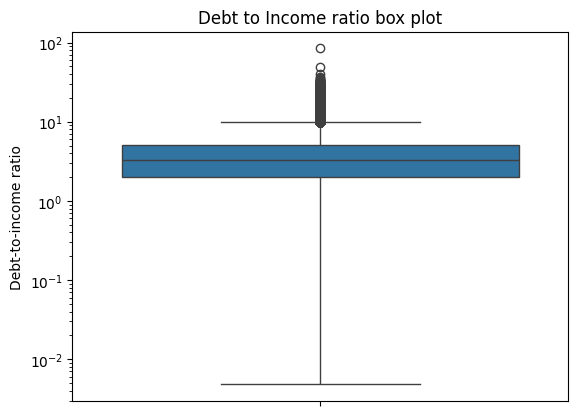

In [18]:
sns.boxplot(y=df['DEBT_INCOME_RATIO'])
plt.title('Debt to Income ratio box plot')
plt.yscale('log')
plt.ylabel('Debt-to-income ratio')
plt.show()

CATEGORICAL VARIABLES

TARGET VARIBALE DISTRIBUTION

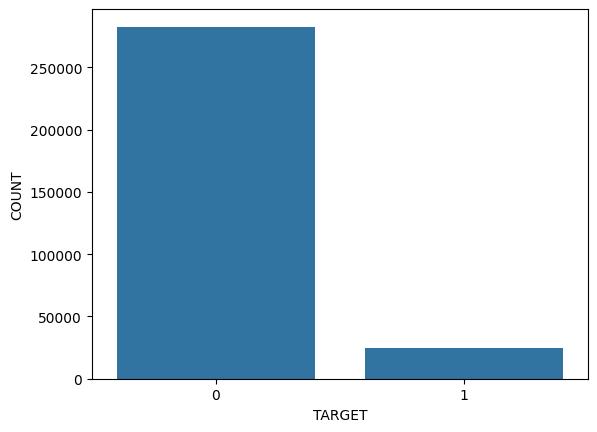

In [19]:
sns.countplot(x='TARGET' , data=df)
plt.xlabel("TARGET")
plt.ylabel("COUNT")
plt.show()

GENDER DISTRIBUTION

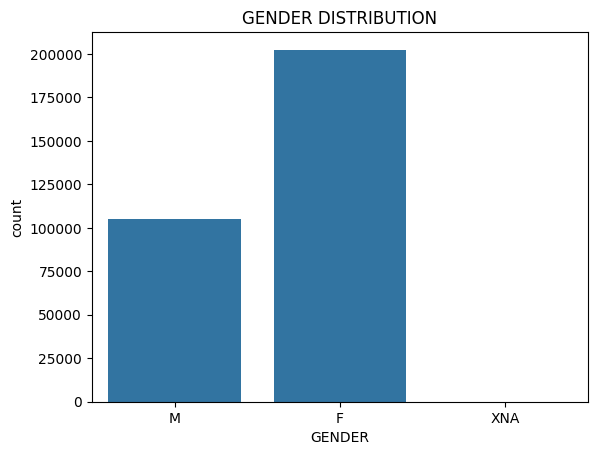

In [20]:
sns.countplot(x='CODE_GENDER', data=df)
plt.title('GENDER DISTRIBUTION')
plt.xlabel('GENDER')
plt.show()

LOAN TYPE DISTRIBUTION

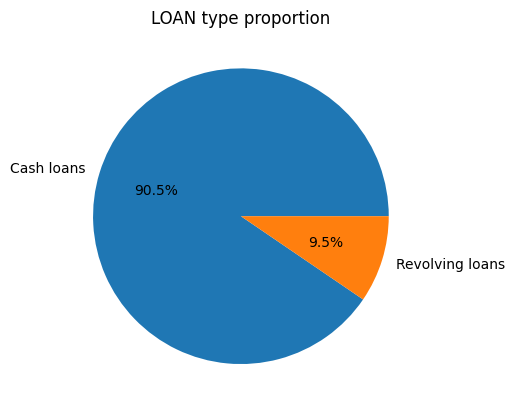

In [23]:
df['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('LOAN type proportion')
plt.ylabel('')
plt.show()

EDUCATION TYPE DISTRIBUTION

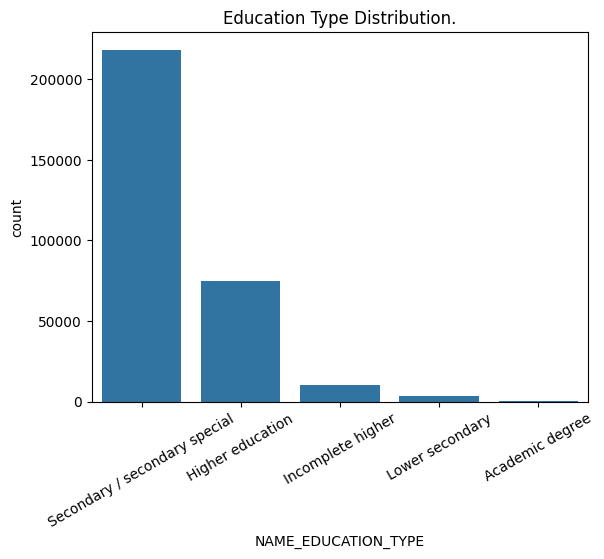

In [26]:
sns.countplot(x='NAME_EDUCATION_TYPE' , data=df)
plt.title('Education Type Distribution.')
plt.xticks(rotation=30)
plt.show()

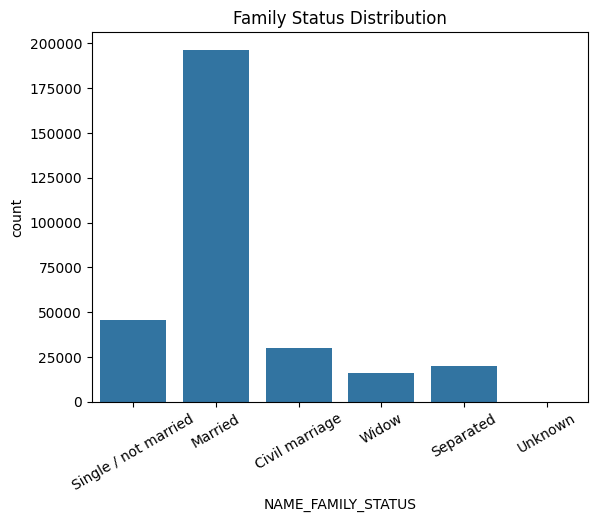

In [28]:
sns.countplot(x='NAME_FAMILY_STATUS', data=df)
plt.title('Family Status Distribution')
plt.xticks(rotation=30)
plt.show()

BIVARIATE ANALYSIS

Continuous variables vs TARGET(Relating to target to see what factors affect TARGET in what way)

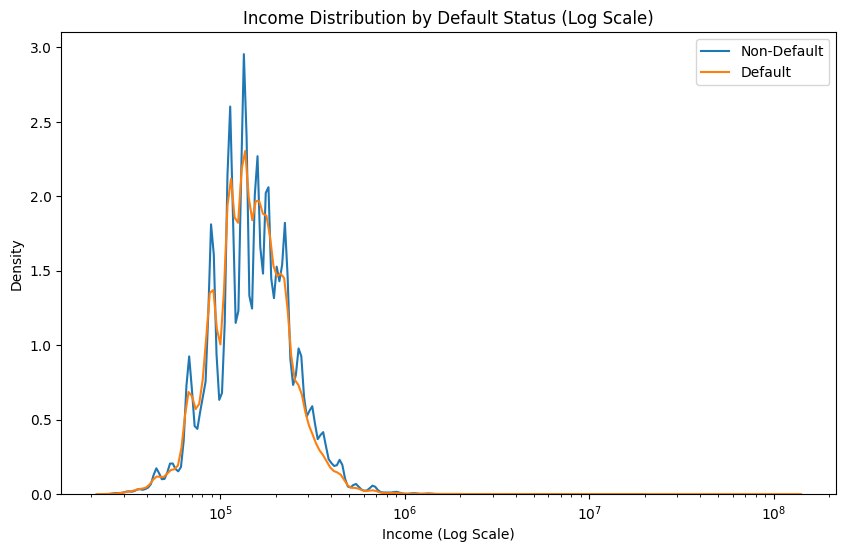

In [37]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['TARGET'] == 0]['AMT_INCOME_TOTAL'], label='Non-Default', log_scale=True)
sns.kdeplot(data=df[df['TARGET'] == 1]['AMT_INCOME_TOTAL'], label='Default', log_scale=True)
plt.title('Income Distribution by Default Status (Log Scale)')
plt.xlabel('Income (Log Scale)')
plt.ylabel('Density')
plt.legend()
plt.show()

Age_years and TARGET

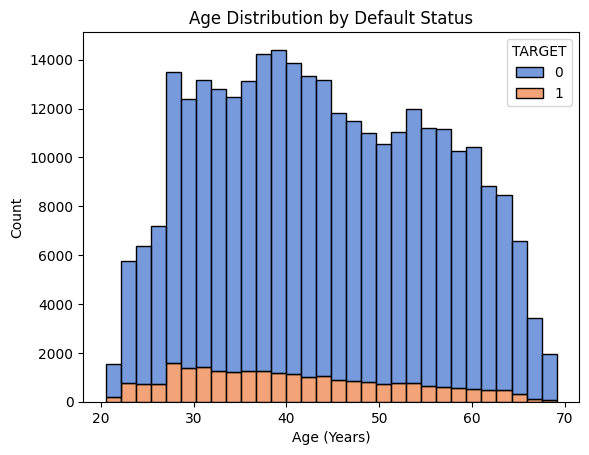

In [41]:
sns.histplot(data=df, x='AGE_YEAR', hue='TARGET', bins=30, multiple='stack', palette='muted')
plt.title('Age Distribution by Default Status')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

YEARS EMPLOYED

In [43]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'DAYS_REGISTRATION',
       'AGE_YEAR', 'Years_EMPLOYED', 'DEBT_INCOME_RATIO'],
      dtype='object')

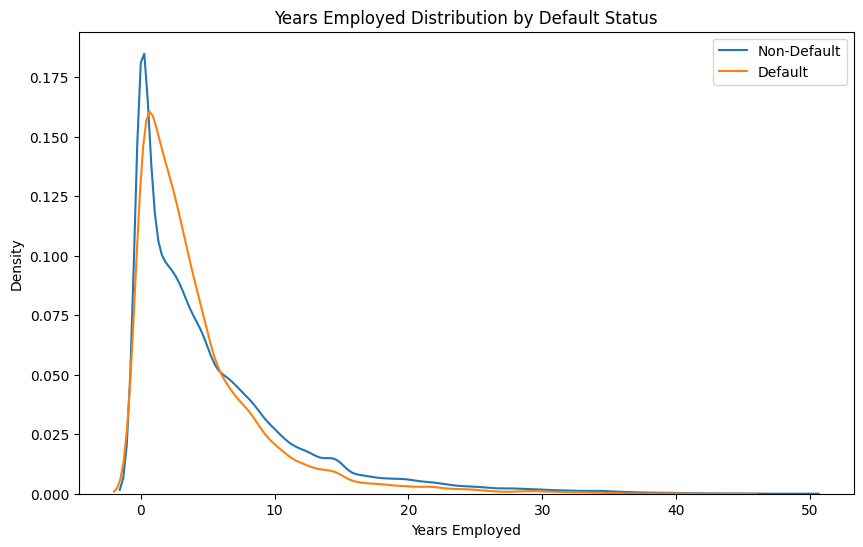

In [44]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['TARGET'] == 0]['Years_EMPLOYED'], label='Non-Default')
sns.kdeplot(data=df[df['TARGET'] == 1]['Years_EMPLOYED'], label='Default')
plt.title('Years Employed Distribution by Default Status')
plt.xlabel('Years Employed')
plt.ylabel('Density')
plt.legend()
plt.show()

DEBT to INCOME ratio

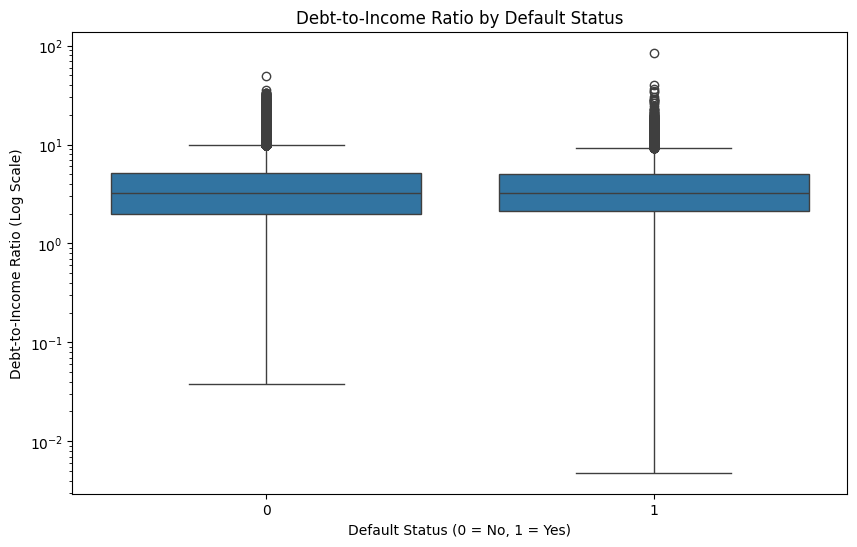

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='DEBT_INCOME_RATIO', data=df)
plt.title('Debt-to-Income Ratio by Default Status')
plt.yscale('log')
plt.ylabel('Debt-to-Income Ratio (Log Scale)')
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.show()

CATEGORICAL VARIABLES 

GENDER vs TARGET

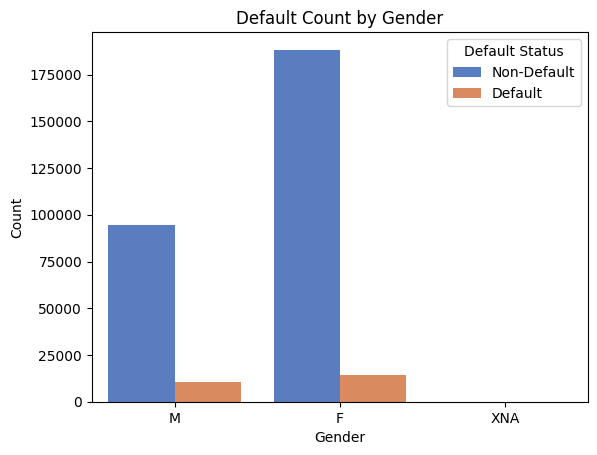

In [47]:

sns.countplot(x='CODE_GENDER', hue='TARGET', data=df, palette='muted')
plt.title('Default Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.show()

LOAN TYPE vs TARGET

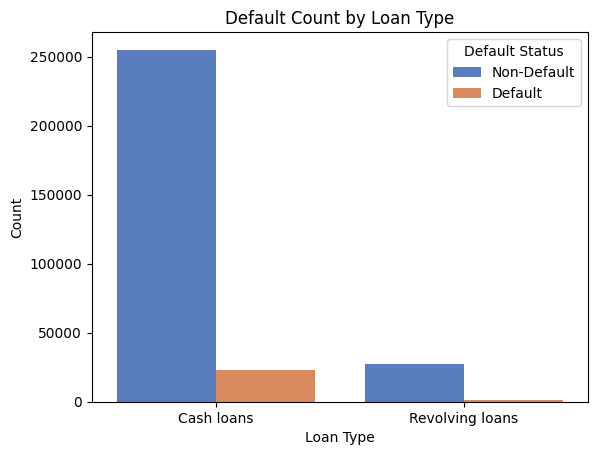

In [48]:

sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df, palette='muted')
plt.title('Default Count by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.show()

EDUCATION TYPE vs TARGET

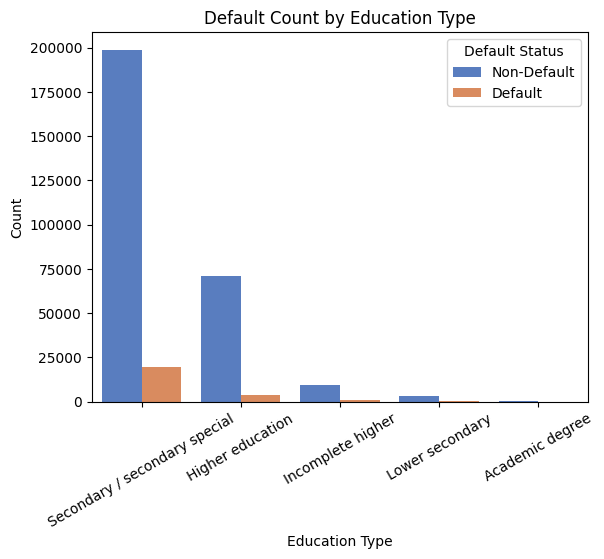

In [50]:

sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df, palette='muted')
plt.title('Default Count by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Default Status', labels=['Non-Default', 'Default'])
plt.show()

CORRELATION ANALYSIS

In [51]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE', 'DAYS_REGISTRATION',
       'AGE_YEAR', 'Years_EMPLOYED', 'DEBT_INCOME_RATIO'],
      dtype='object')

In [52]:
# Select numerical columns
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AGE_YEAR', 'Years_EMPLOYED', 'DAYS_REGISTRATION', 'DEBT_INCOME_RATIO', 'TARGET']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Display correlations with TARGET
print(correlation_matrix['TARGET'].sort_values(ascending=False))

TARGET               1.000000
DAYS_REGISTRATION    0.041975
AMT_INCOME_TOTAL    -0.003982
DEBT_INCOME_RATIO   -0.007727
AMT_ANNUITY         -0.012817
AMT_CREDIT          -0.030369
AMT_GOODS_PRICE     -0.039645
Years_EMPLOYED      -0.046052
AGE_YEAR            -0.078239
Name: TARGET, dtype: float64


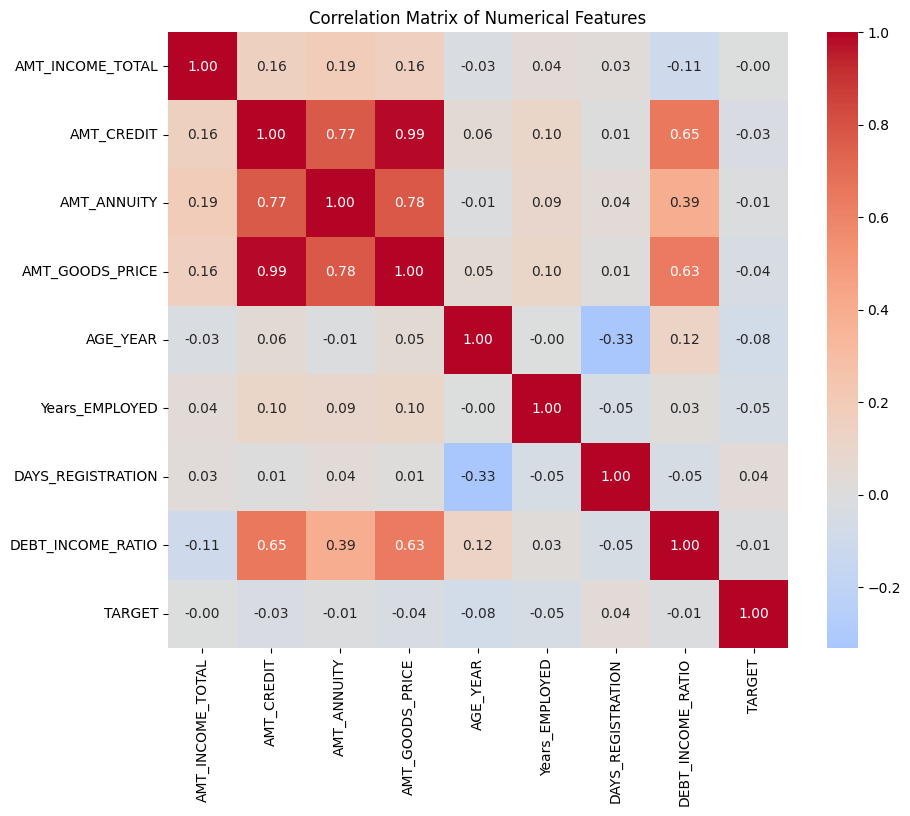

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()